<a href="https://colab.research.google.com/github/preeti13456/intro-to-tensorflow-for-ai-coursera/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt


In [0]:
print(tf.__version__)

2.2.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape


(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

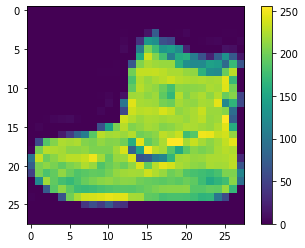

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


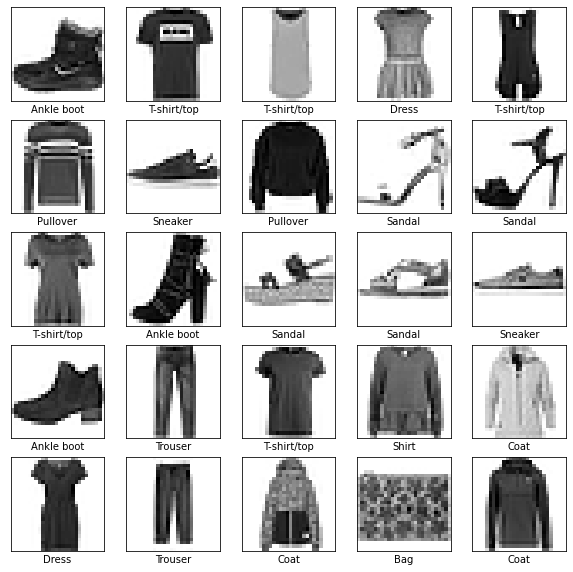

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2561 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3288 - accuracy: 0.8856


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([2.6829804e-08, 4.2856882e-07, 5.8922982e-09, 1.9019801e-09,
       1.4493429e-08, 2.2049696e-04, 1.0268534e-06, 1.1113533e-02,
       3.3962451e-07, 9.8866409e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

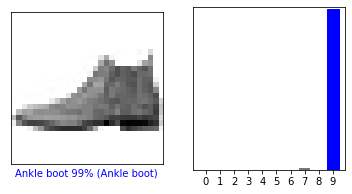

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

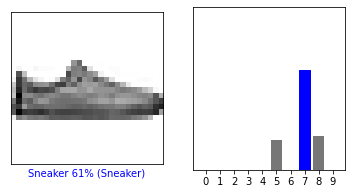

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

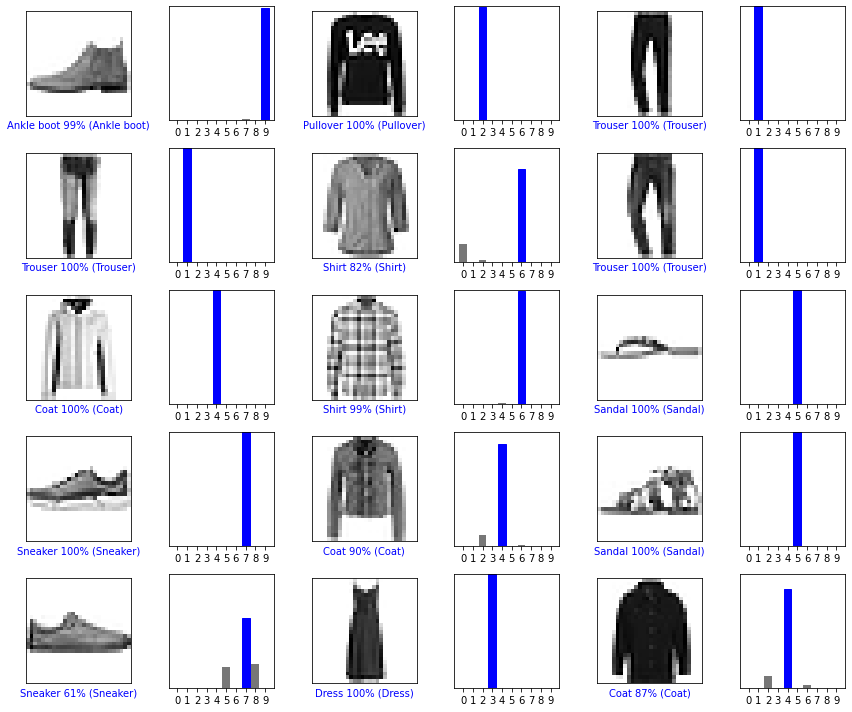

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.8435810e-05 1.9361241e-16 9.9714124e-01 9.6331970e-11 1.9188778e-03
  2.4691763e-12 9.0152392e-04 1.3222133e-14 4.6206480e-11 3.4329500e-14]]


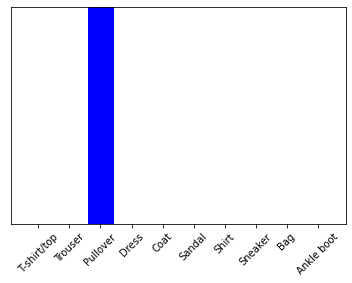

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9774


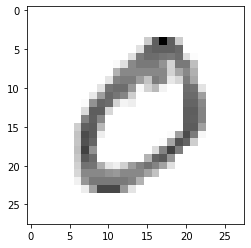

313/313 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9746
0.08591269701719284 0.9746000170707703
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_pred/assets
2


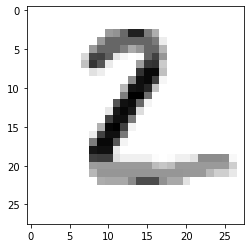

In [0]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=tf.keras.utils.normalize(x_train)
x_test=tf.keras.utils.normalize(x_test)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
    
model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)
import matplotlib.pyplot as plt

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()
val_loss, val_acc= model.evaluate(x_test,y_test)
print(val_loss, val_acc)
model.save('num_pred')
new_model=tf.keras.models.load_model('num_pred')
predictions=new_model.predict(x_test)
import numpy as np
print(np.argmax(predictions[1]))
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()